In [23]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('D:\programe\sales_data.csv')

# Cleaning data 


In [25]:
df

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0
...,...,...,...,...,...,...
364,2022-12-27,Watch,Accessories,150.0,5.0,750.0
365,2022-12-28,Coat,Clothing,100.0,5.0,500.0
366,2022-12-29,Headphones,Electronics,100.0,10.0,1000.0
367,2022-12-30,Smartphone,Electronics,600.0,11.0,6600.0


In [26]:
df['category'].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes',
       'Clohting', 'Bgas', 'Shoeses'], dtype=object)

In [27]:
# Create a dictionary of misspellings and their corrections
corrections = {'clohting': 'Clothing', 'Bgas': 'Bags', 'Shoeses': 'Shoes'}

# Correct the misspellings in the 'product' column
df['category'] = df['category'].replace(corrections)

In [28]:
df['category'].unique()

array(['Electronics', 'Clothing', 'Accessories', 'Bags', 'Shoes',
       'Clohting'], dtype=object)

In [29]:
df['product'].unique()

array(['Smartphone', 'Laptop', 'T-Shirt', 'Headphones', 'Watch', 'Tablet',
       'Coat', 'Smartwatch', 'Speaker', 'Backpack', 'Hoodie', 'Sneakers',
       'Wallet', 'Jeans'], dtype=object)

In [30]:
df.date.sort_values

<bound method Series.sort_values of 0      2022-01-01
1      2022-01-01
2      2022-01-02
3      2022-01-03
4      2022-01-04
          ...    
364    2022-12-27
365    2022-12-28
366    2022-12-29
367    2022-12-30
368    2022-12-31
Name: date, Length: 369, dtype: object>

In [31]:
df.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [32]:
# Fill Nan values in 'quatity'
df['quantity'] = df.apply(lambda row: row['revenue'] / row['price'] if pd.isnull(row['quantity']) else row['quantity'], axis=1)

# Fill NaN values in 'price'
df['price'] = df.apply(lambda row: row['revenue'] / row['quantity'] if pd.isnull(row['price']) else row['price'], axis=1)

# Fill NaN values in 'revenue'
df['revenue'] = df.apply(lambda row: row['price'] * row['quantity'] if pd.isnull(row['revenue']) else row['revenue'], axis=1)


In [33]:
df.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

# EDA

1-What was the total revenue generated by the company over the course of the year?

In [54]:
total_revenue = df['revenue'].sum()
print(f'The total revenue generated by the company over the course of the year is ${total_revenue:.2f}')

The total revenue generated by the company over the course of the year is $760330.00


2-Which product had the highest revenue? How much revenue did it generate?

In [55]:
df = pd.DataFrame(df)

# Group by product and calculate total revenue for each product
product_revenue = df.groupby('product')['revenue'].sum()

# Find the product with the highest revenue
highest_revenue_product = product_revenue.idxmax()
highest_revenue_amount = product_revenue.max()

print(f'The product with the highest revenue is "{highest_revenue_product}" with a revenue of ${highest_revenue_amount:,}')

The product with the highest revenue is "Smartphone" with a revenue of $434,400.0


3-What was the average price of a product sold by the company?

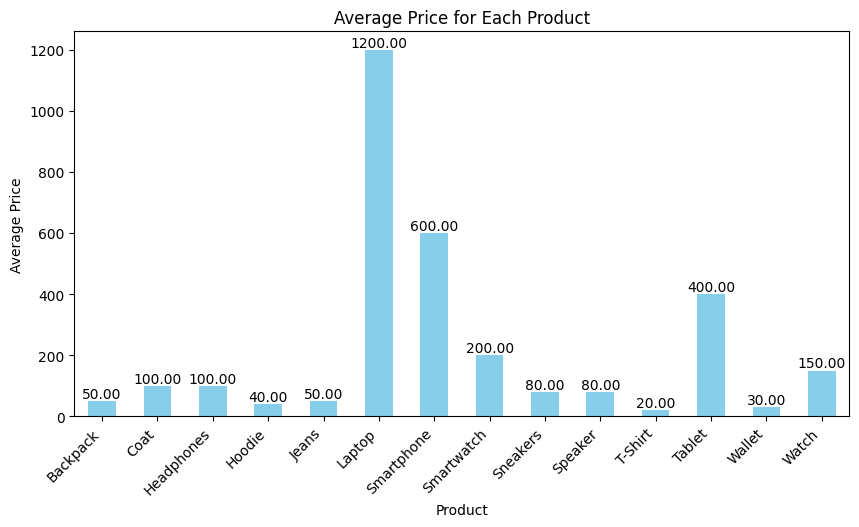

In [72]:
average_price_per_product = df.groupby('product')['price'].mean()

# Plot the average price for each product with values inside the bars
plt.figure(figsize=(10, 5))
ax = average_price_per_product.plot(kind='bar', color='skyblue')

# Add values inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 0), textcoords='offset points')

plt.title('Average Price for Each Product')
plt.xlabel('Product')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

4-What was the total quantity of products sold by the company?

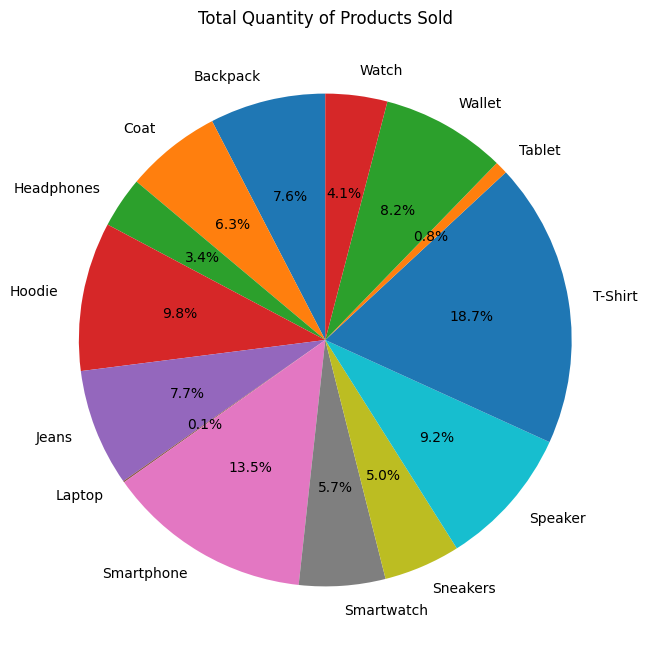

In [78]:
total_quantity_per_product = df.groupby('product')['quantity'].sum()

# Plot the total quantity as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_quantity_per_product, labels=total_quantity_per_product.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
plt.title('Total Quantity of Products Sold')
plt.show()

5-Which category had the highest revenue? How much revenue did it generate?

In [38]:
product_revenue = df.groupby('category')['revenue'].sum()

# Find the category with the highest revenue
highest_revenue_category = product_revenue.idxmax()
highest_revenue_amount = product_revenue.max()

print(f'The product with the highest revenue is "{highest_revenue_category}" with a revenue of ${highest_revenue_amount:,}')

The product with the highest revenue is "Electronics" with a revenue of $516,080.0


6-What was the average revenue per sale?

In [84]:
df['date'] = pd.to_datetime(df['date'])

# Calculate total revenue
total_revenue = df['revenue'].sum()

# Calculate the total number of sales
total_sales = len(df)

# Calculate average revenue per sale
average_revenue_per_sale = total_revenue / total_sales

print(f'The average revenue per sale is {average_revenue_per_sale:.2f} $')

The average revenue per sale is 2060.51 $


7-What was the total revenue generated in each quarter of the year? (i.e. Q1, Q2, Q3, Q4)

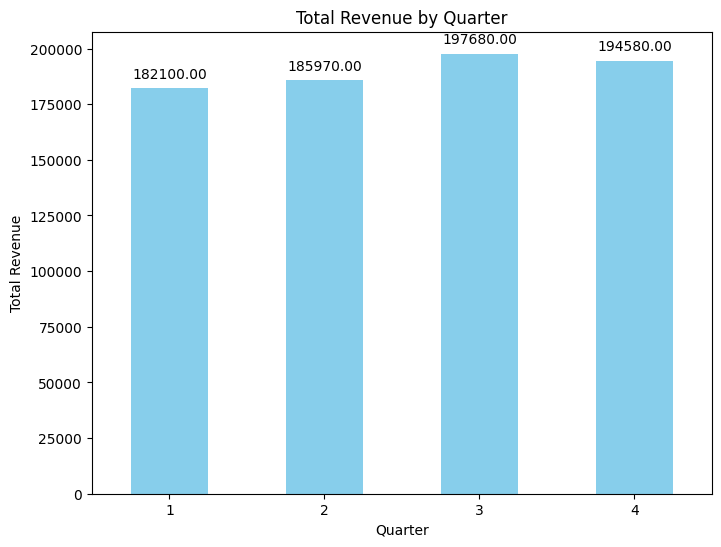

In [96]:
# Assuming 'date' is a datetime column in your DataFrame
df['date'] = pd.to_datetime(df['date'])

# Extract the quarter from the date
df['quarter'] = df['date'].dt.quarter


# Plot the total revenue for each quarter with annotations
plt.figure(figsize=(8, 6))
ax = quarterly_revenue.plot(kind='bar', color='skyblue')

# Add annotations inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()